# FTP

In [1]:
_FTP_ = 225
_PATH_ = '/home/caster/training_data'

# Load dependencies

In [2]:
%run -i training_functions.py

In [3]:
t_data = read_intervals(_PATH_, _FTP_)

t_data[:10].drop(['watts_std', 'watts_25', 'watts_50', 'watts_75', 'watts_max', 'temp', 'hr_max'], axis=1)


/usr/lib/python2.7/site-packages/ipykernel/__main__.py:58: RuntimeWarning: divide by zero encountered in double_scalars


,filename,epoch_day,time,cad,hr,hr_min,hr_drift,km,kph,kilojoules,watts,np,alt,vi,tss,if,training_type
0,2017_02_18_11_13_04.utf8.json,17215,118,62.952481,151.204584,104,-0.233592,51.11070,25.871660,1064.2005,149.173045,227.744560,443.6,1.526714,152.671389,1.012198,Endurance
0,2017_02_22_17_33_49.utf8.json,17219,67,NaN,131.801924,90,NaN,24.28590,21.456039,NaN,NaN,NaN,390.6,NaN,NaN,NaN,NA
0,2017_03_07_17_47_18.utf8.json,17232,10,62.576433,137.426752,114,0.339606,4.69625,26.520306,93.3940,148.716561,216.195434,67.2,1.453741,0.000000,0.960869,Endurance
0,2017_03_07_17_47_18.utf8.json,17232,23,86.882497,171.672943,147,0.129740,18.93060,35.632825,310.9230,216.822176,234.398718,86,1.081064,0.000000,1.041772,FTP
0,2017_03_07_17_47_18.utf8.json,17232,46,71.348523,155.900576,126,-0.014478,37.26620,23.778161,400.1225,144.136347,235.856360,188.2,1.636342,0.000000,1.048250,Endurance
0,2017_03_10_17_46_57.utf8.json,17235,4,61.197761,138.582090,118,0.002620,0.91421,12.047118,42.8330,159.824627,221.239447,39.6,1.384264,0.000000,0.983286,Endurance
0,2017_03_10_17_46_57.utf8.json,17235,26,61.663425,145.644605,115,0.082763,23.27900,30.088589,174.7355,109.620765,186.888240,72.6,1.704862,0.000000,0.830614,Active recovery
0,2017_03_10_17_46_57.utf8.json,17235,20,80.738372,174.304817,138,0.146455,9.96009,26.927528,269.7650,224.057309,236.577337,158.6,1.055879,0.000000,1.051455,FTP
0,2017_03_11_17_34_54.utf8.json,17236,87,68.018194,135.779672,102,-0.012015,34.94850,23.891792,749.9425,142.873404,181.344455,501.2,1.269267,126.926670,0.805975,Endurance
0,2017_03_17_18_00_29.utf8.json,17242,16,81.361111,175.579293,157,0.178841,25.67930,38.147976,232.4320,234.779798,257.933357,39.6,1.098618,0.000000,1.146370,FTP


# Show plot with current data

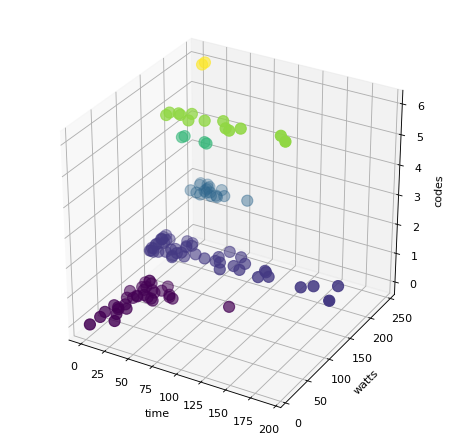

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

x_label = 'time'
y_label = 'watts'
z_label = 'codes'

clean = t_data.drop(['filename', 'epoch_day', 'temp'], axis=1)

codes = pd.Categorical(clean.training_type)
cath = pd.DataFrame({"codes": codes.codes})

clean.reset_index(drop=True, inplace=True)
cath.reset_index(drop=True, inplace=True)
clean = pd.concat([clean, cath], axis=1)

clean = clean[(clean[x_label] != np.nan) & (clean[y_label] != np.nan) & (clean[z_label] != np.nan)]

x = clean[x_label]
y = clean[y_label]
z = clean[z_label]

fig = plt.figure(figsize=(7, 7), dpi=80)

ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.set_zlabel(z_label)


sc = StandardScaler()
ax.scatter(x, y, z, c=clean.codes, s=100)

plt.show()

# Reset data
# clean = pd.concat([clean.drop(['training_type'], axis=1), pd.get_dummies(clean.training_type)], axis=1)

# Clean dataset to use just the needed features

In [5]:
from sklearn.utils import shuffle

data = shuffle(clean, random_state=7)
data.dropna(inplace=True)

columns_to_remove = ['codes', 'training_type', 'km', 'kph', 'watts_max', 'alt', 'tss']

samples = 70

# Split into training and test
x_train = data.drop(columns_to_remove, axis=1)[:samples]
x_test = data.drop(columns_to_remove, axis=1)[samples:]

y_train = data.codes[:samples]
y_test = data.codes[samples:]

x_train[:10]

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,time,cad,hr,hr_min,hr_max,hr_drift,kilojoules,watts,watts_std,watts_25,watts_50,watts_75,np,vi,if
65,1,11.179487,125.807692,110,134,1.000000,2.9670,38.038462,132.159530,0,0,0,276.279143,7.263152,1.227907
98,12,42.367686,123.574468,105,172,-1.732748,30.5485,40.623005,56.802897,0,0,69.25,111.954607,2.755941,0.497576
81,20,80.551250,162.411667,129,171,0.082751,263.4580,219.548333,29.731537,204,222,238,225.280589,1.026109,1.001247
76,5,83.097682,148.605960,137,169,-0.256608,39.8065,131.809603,43.722171,102,141,160,148.644307,1.127720,0.660641
104,7,60.926247,127.475054,102,145,0.257454,48.5720,105.362256,48.394675,93,112,136,125.748141,1.193484,0.558881
88,5,59.332226,125.318937,93,139,0.064621,46.4590,154.348837,94.787805,76,159,236,211.018090,1.367150,0.937858
5,4,61.197761,138.582090,118,154,0.002620,42.8330,159.824627,101.345716,76.75,158.5,251,221.239447,1.384264,0.983286
95,5,54.370370,128.912037,113,144,-0.162348,45.4270,140.206790,88.678540,75.75,134,211,197.835014,1.411023,0.879267
107,30,60.642012,153.374933,106,175,-0.061974,370.6380,199.374933,41.889901,183,206,227,209.517619,1.050872,0.931189
62,124,65.803614,135.380568,91,167,0.100480,1063.0230,141.774206,71.297269,107.25,154,188,179.875106,1.268744,0.799445


# Classify using Random Forest

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier(n_estimators=100)

clf = clf.fit(x_train, y_train)

score = clf.score(x_test, y_test)

print("Score: %f%%" % (score.mean()*100))

Score: 95.833333%


# Classify using Knn

Score 83.333333% (uniform)
Score 83.333333% (distance)


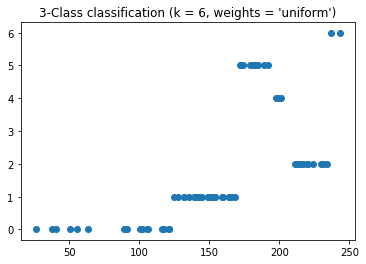

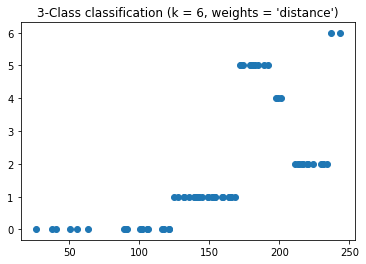

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors

n_neighbors = 6

for weights in ['uniform', 'distance']:
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(x_train, y_train)
    
    # Plot
    plt.figure()

    # Plot also the training points
    plt.scatter(x_train.watts, y_train)
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    
    print("Score %f%% (%s)" % (clf.score(x_test, y_test).mean()*100, weights))

plt.show()

# Classify using SVM

In [8]:
from sklearn import svm

clf = svm.SVC()
clf.fit(x_train, y_train)  

score = clf.score(x_test, y_test)

print("Score: %f%%" % (score.mean()*100))

Score: 45.833333%
